In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from GMesh import RegularCoord
from GMesh import UniformEDS

In [3]:
help( UniformEDS )

Help on class UniformEDS in module GMesh:

class UniformEDS(builtins.object)
 |  UniformEDS(lon, lat, elevation=None)
 |  
 |  Container for a uniform elevation dataset
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lon, lat, elevation=None)
 |      (lon,lat) are cell centers and 1D with combined shape equalt that of elevation.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  bb_slices(self, lon, lat)
 |      Returns the slices defining the bounding box of data hit by (lon,lat)
 |  
 |  indices(self, lon, lat)
 |      Return the i,j indices of cells in which (lon,lat) fall
 |  
 |  subset(self, islice, jslice)
 |      Subset a UniformEDS as [jslice,islice]
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [4]:
# class UniformEDS:
#     """Container for a uniform elevation dataset"""
#     def __init__( self, lon, lat, elevation=None ):
#         """(lon,lat) are cell centers and 1D with combined shape equalt that of elevation."""
#         assert len(lon.shape) == 1, "Longitude must be 1D"
#         assert len(lat.shape) == 1, "Latitude must be 1D"
#         self.ni = len(lon)
#         self.nj = len(lat)
#         # Store coordinates for posterity
#         self.lonh, self.lath = lon, lat

#         if elevation is None: # We allow the creation of a "blank" UniformEDS when subsetting
#             self.lon_coord, self.lat_coord = None, None
#             self.lonq, self.latq = None, None
#             self.data = np.zeros((0))
#         else: # This is the real constructor
#             assert len(lon) == elevation.shape[1], "Inconsistent longitude shape"
#             assert len(lat) == elevation.shape[0], "Inconsistent latitude shape"
#             dlon, dlat = 360. / self.ni, 180 / self.nj
#             assert np.abs( lon[-1] - lon[0] - 360 + dlon ) < 1.e-5 * dlon, "longitude does not appear to be global"
#             assert np.abs( lat[-1] - lat[0] - 180 + dlat ) < 1.e-5 * dlat, "latitude does not appear to be global"
#             lon0 = np.floor( lon[0] - 0.5 * dlon + 0.5 ) # Calculating the phase this way restricts ourselves to data starting on integer values
#             print('LON0 =',lon0)
#             assert np.abs( lon[0] - 0.5 * dlon - lon0 ) < 1.e-9 * dlon, "edge of longitude is not a round number"
#             assert np.abs( lat[0] - 0.5 * dlat + 90 ) < 1.e-9 * dlat, "edge of latitude is not 90"
    
#             self.lon_coord = RegularCoord( self.ni, lon0, True)
#             self.lat_coord = RegularCoord( self.nj, -90, False)
#             # Calculate node coordinates for convenient plotting
#             self.lonq = lon0 + dlon * ( np.arange( self.ni + 1 ) )
#             self.latq = dlat * ( np.arange( self.nj + 1 ) - 0.5 * self.nj )
#             self.data = elevation
#     def __repr__( self ):
#         return '<UniformEDS {} x {}\nlon = {}\n{}\n{}\nlat = {}\n{}\n{}\ndata = {}>'.format( \
#             self.ni, self.nj, self.lon_coord, self.lonh, self.lonq, self.lat_coord, self.lath, self.latq, self.data.shape )
#     def subset( self, islice, jslice ):
#         """Subset a UniformEDS as [jslice,islice]"""
#         S = UniformEDS( self.lonh[islice], self.lath[jslice] )
#         S.lon_coord = self.lon_coord.subset(islice)
#         S.lat_coord = self.lat_coord.subset(jslice)
#         S.lonq = self.lonq[ slice( islice.start, islice.stop + 1 ) ]
#         S.latq = self.latq[ slice( jslice.start, jslice.stop + 1 ) ]
#         S.data = self.data[jslice, islice]
#         return S
#     def indices( self, lon, lat ):
#         """Return the i,j indices of cells in which (lon,lat) fall"""
#         return self.lon_coord.indices( lon ), self.lat_coord.indices( lat )
#     def bb_slices( self, lon, lat ):
#         """Returns the slices defining the bounding box of data hit by (lon,lat)"""
#         si, sj = self.indices( lon, lat )
#         return slice( si.min(), si.max() +1 ), slice( sj.min(), sj.max() + 1 )

In [5]:
r = 0.25
x = ( np.arange(360*r) + 0.5 ) * (1./r) - 180
y = ( np.arange(180*r) + 0.5 ) * (1./r) - 90
DS = UniformEDS( x, y, np.meshgrid(x,y)[0] )
print(DS)

LON0 = -180.0
<UniformEDS 90 x 45
lon = <RegularCoord n=90, dx=4.0, rdx=0.25, x0=-180.0, io=-45, rem=0.0, is-ie=0-90, periodic=True>
[-178. -174. -170. -166. -162. -158. -154. -150. -146. -142. -138. -134.
 -130. -126. -122. -118. -114. -110. -106. -102.  -98.  -94.  -90.  -86.
  -82.  -78.  -74.  -70.  -66.  -62.  -58.  -54.  -50.  -46.  -42.  -38.
  -34.  -30.  -26.  -22.  -18.  -14.  -10.   -6.   -2.    2.    6.   10.
   14.   18.   22.   26.   30.   34.   38.   42.   46.   50.   54.   58.
   62.   66.   70.   74.   78.   82.   86.   90.   94.   98.  102.  106.
  110.  114.  118.  122.  126.  130.  134.  138.  142.  146.  150.  154.
  158.  162.  166.  170.  174.  178.]
[-180. -176. -172. -168. -164. -160. -156. -152. -148. -144. -140. -136.
 -132. -128. -124. -120. -116. -112. -108. -104. -100.  -96.  -92.  -88.
  -84.  -80.  -76.  -72.  -68.  -64.  -60.  -56.  -52.  -48.  -44.  -40.
  -36.  -32.  -28.  -24.  -20.  -16.  -12.   -8.   -4.    0.    4.    8.
   12.   16.   20.   24.  

In [6]:
DS.indices( [-90, 0], [0, 30] )

(array([22, 45]), array([22, 30]))

In [7]:
si, sj = DS.bb_slices( [-90, 0], [0, 30] )
si, sj

(slice(22, 46, None), slice(22, 31, None))

In [8]:
SS = DS.subset( si, sj )
print(SS)

<UniformEDS 24 x 9
lon = <RegularCoord n=90, dx=4.0, rdx=0.25, x0=-180.0, io=-45, rem=0.0, is-ie=22-46, periodic=True>
[-90. -86. -82. -78. -74. -70. -66. -62. -58. -54. -50. -46. -42. -38.
 -34. -30. -26. -22. -18. -14. -10.  -6.  -2.   2.]
[-92. -88. -84. -80. -76. -72. -68. -64. -60. -56. -52. -48. -44. -40.
 -36. -32. -28. -24. -20. -16. -12.  -8.  -4.   0.   4.]
lat = <RegularCoord n=45, dx=4.0, rdx=0.25, x0=-90, io=-23, rem=0.5, is-ie=22-31, periodic=False>
[ 0.  4.  8. 12. 16. 20. 24. 28. 32.]
[-2.  2.  6. 10. 14. 18. 22. 26. 30. 34.]
data = (9, 24)>


(25,) (10,) (9, 24)


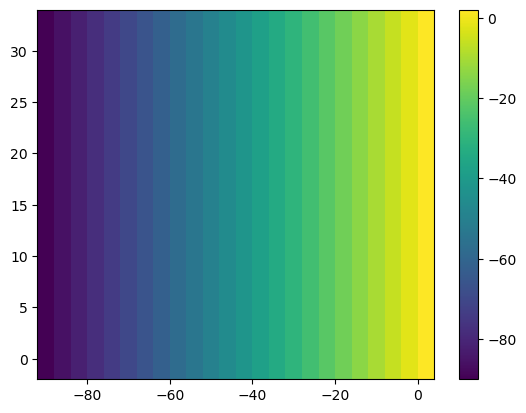

In [9]:
print( SS.lonq.shape, SS.latq.shape, SS.data.shape )
plt.pcolormesh( SS.lonq, SS.latq, SS.data ); plt.colorbar();